In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn


In [2]:
# READ MEMBERS DATASET 


members = pd.read_csv("F:/KKBOX/members.csv", sep = ",")

# Sample submission zero

sample_submission_zero = pd.read_csv("F:/KKBOX/sample_submission_zero.csv", sep = ",")

# READ train dataset 

train  = pd.read_csv("F:/KKBOX/train.csv", sep = ",")

In [3]:
print("Wymiar treningowego Zestawu danych:")
print("Wiersze: ", train.shape[0], "Kolumny: ", train.shape[1])

Wymiar treningowego Zestawu danych:
Wiersze:  992931 Kolumny:  2


In [4]:
pd.crosstab(train['is_churn'], columns = "Count") 

col_0,Count
is_churn,
0,929460
1,63471


In [5]:
# Wczytanie zestawów transakcji 

transactions = pd.read_csv("F:/KKBOX/transactions.csv", sep = ",")

In [6]:
print("Liczba kolumn zestawu z transakcjami ", transactions.shape[1])
print("Liczba wierszy zestawu z transakcjami", transactions.shape[0])

Liczba kolumn zestawu z transakcjami  9
Liczba wierszy zestawu z transakcjami 21547746


In [7]:
# Informacje o kolumnach zestawu treningowego 
# Dodanie mediany, odchylenia standardowego, min, max

# Create an transaction_aggregate table, 
# which include descriptive statistics about historical elements 
# of actual amount paid 



transaction_aggregate = transactions[['msno', 'actual_amount_paid']].groupby(['msno']).agg(['mean','median', 'min', 'max', 'count'])
transaction_aggregate.columns


MultiIndex(levels=[['actual_amount_paid'], ['mean', 'median', 'min', 'max', 'count']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]])

In [8]:
transaction_aggregate.columns  = transaction_aggregate.columns.droplevel()


In [10]:
transaction_aggregate.columns

Index(['mean', 'median', 'min', 'max', 'count'], dtype='object')

In [11]:
transaction_aggregate['msno']  =  transaction_aggregate.index

In [12]:
# Rename variables in transaction_aggregate dataset


transaction_aggregate = transaction_aggregate.rename(index = str, columns = {"max" : "trans_max", 
                                                     "count" : "trans_count", 
                                                     "median" : "trans_median", 
                                                     "max"    : "trans_max", 
                                                     "mean"   : "trans_mean"})

In [13]:
transaction_aggregate.columns

Index(['trans_mean', 'trans_median', 'min', 'trans_max', 'trans_count',
       'msno'],
      dtype='object')

In [14]:
# Join 5 variables from transaction_aggregate dataset 

train = pd.merge(train, transaction_aggregate, how = 'left', on = 'msno')


In [15]:
train.shape

(992931, 7)

In [16]:
train.columns

Index(['msno', 'is_churn', 'trans_mean', 'trans_median', 'min', 'trans_max',
       'trans_count'],
      dtype='object')

In [17]:
# Get min and max transaction date, grouped by msno 

trans_date_agg = transactions[['msno', 'transaction_date']].groupby(['msno']).agg(['min', 'max'])


In [18]:
trans_date_agg.columns = trans_date_agg.columns.droplevel()

In [20]:

trans_date_agg.shape
#trans_date_agg.drop_duplicates

trans_date_agg['msno']   = trans_date_agg.index


In [21]:
trans_date_agg = trans_date_agg.rename(index = str, columns = 
                         {"min" : "min_trans_date", 
                         "max"  : "max_trans_date"
                         })

In [22]:


trans_date_agg['min_trans_date']  = pd.datetime(trans_date_agg['min_trans_date'].astype(str),
                                                format = "%Y%m%d"
                                               )

TypeError: cannot convert the series to <class 'int'>

In [23]:
train = pd.merge(train, trans_date_agg,  how = 'left', on = 'msno')

In [24]:
train.shape


(992931, 9)

In [25]:
train.columns

Index(['msno', 'is_churn', 'trans_mean', 'trans_median', 'min', 'trans_max',
       'trans_count', 'min_trans_date', 'max_trans_date'],
      dtype='object')

In [ ]:
train.head

In [32]:
train['max_trans_date'] =  pd.to_datetime(train['max_trans_date'], format = "%Y%m%d")


In [34]:
train['min_trans_date'] =  pd.to_datetime(train['min_trans_date'], format = "%Y%m%d")



In [35]:
train[['max_trans_date', 'min_trans_date']].head

<bound method NDFrame.head of        max_trans_date min_trans_date
0          2017-01-07     2016-10-31
1          2017-02-24     2015-01-31
2          2017-01-12     2016-02-02
3          2016-01-06     2016-01-04
4          2017-01-28     2015-01-02
5          2017-02-15     2015-03-31
6          2017-01-09     2015-08-15
7          2017-01-26     2015-01-28
8          2017-02-01     2015-01-21
9          2017-01-23     2015-06-02
10         2017-02-16     2015-01-06
11         2017-01-04     2017-01-04
12         2017-01-07     2015-01-02
13         2017-01-20     2015-05-04
14         2016-10-26     2015-01-02
15         2016-01-16     2016-01-16
16         2016-08-06     2015-01-03
17         2016-01-04     2016-01-04
18         2017-01-25     2015-07-13
19         2016-01-06     2016-01-06
20         2016-08-03     2015-04-20
21         2017-01-20     2017-01-20
22         2017-01-18     2015-01-10
23         2017-02-17     2015-03-16
24         2016-01-04     2016-01-04
25      

In [40]:
# Get differences between transaction dates

train['trans_date_diff']  =  train['max_trans_date'] - train['min_trans_date']


In [65]:
from datetime import datetime, timedelta

train['trans_date_diff_num']  = train['trans_date_diff'] /  timedelta(days = 1)


In [71]:
train.loc[train['trans_date_diff_num'] > 0, :] 

,msno,is_churn,trans_mean,trans_median,min,trans_max,trans_count,min_trans_date,max_trans_date,trans_date_diff,trans_date_diff_num
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,74.500000,74.5,0,149,2,2016-10-31,2017-01-07,68 days,68.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,150.347826,149.0,149,180,23,2015-01-31,2017-02-24,755 days,755.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,149.200000,149.0,149,150,10,2016-02-02,2017-01-12,345 days,345.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,894.000000,894.0,0,1788,2,2016-01-04,2016-01-06,2 days,2.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,447.000000,149.0,149,1788,8,2015-01-02,2017-01-28,757 days,757.0
5,GBy8qSz16X5iYWD+3CMxv/Hm6OPSrXBYtmbnlRtknW0=,1,149.000000,149.0,149,149,22,2015-03-31,2017-02-15,687 days,687.0
6,lYLh7TdkWpIoQs3i3o6mIjLH8/IEgMWP9r7OpsLX0Vo=,1,160.909091,150.0,150,180,11,2015-08-15,2017-01-09,513 days,513.0
7,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,153.227273,149.0,149,180,22,2015-01-28,2017-01-26,729 days,729.0
8,Nb1ZGEmagQeba5E+nQj8VlQoWl+8SFmLZu+Y8ytIamw=,1,174.227273,150.0,149,477,22,2015-01-21,2017-02-01,742 days,742.0
9,MkuWz0Nq6/Oq5fKqRddWL7oh2SLUSRe3/g+XmAWqW1Q=,1,119.200000,149.0,0,149,5,2015-06-02,2017-01-23,601 days,601.0


In [50]:
# Transaction date in the same day  varaible 

import matplotlib.pyplot as plt
%matplotlib inline

TypeError: Empty 'DataFrame': no numeric data to plot

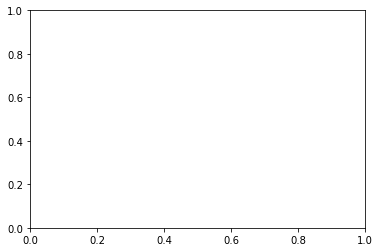

In [57]:
plt.figure()
train['trans_date_diff'].plot.hist()
plt.show()

In [ ]:
# User logs csv


user_logs = pd.read_csv("F:/KKBOX/user_logs.csv", sep = ",", nrows= 100000)

user_logs.shape

In [ ]:
# Wczytanie all dataset 


user_logs = pd.read_csv("F:/KKBOX/user_logs.csv", sep = ",", nrows = 2000000)
user_logs.shape



In [ ]:
user_logs.columns

In [ ]:
user_logs.head